<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Data_or_Feature_Scaling_Normalization_In_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE-We have implemented two models in this workbook. One with the data having different scale and one with the normalized data and we have studied the comparision study in validation accuracy in both the case.**

Dataset Used - https://www.kaggle.com/datasets/rakeshrau/social-network-ads?select=Social_Network_Ads.csv

**Feature Scaling-**

Lets consider you have classificaation problem of whether we have outpur yes or no.If you have range of two input columns very different for example, you have age and salary as input columns. Age ranges from 0 to 80 and salary might range from 10000 to 50000 . In such case we will have to make the range of both input features in same range and it is known as Feature Scaling or Normalization.

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd


In [4]:
#Storing dataset in pandas dataframe
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df = df.drop(columns=['User ID','Gender'])
#We dont need User ID and Gender columns so dropping both these columns from dataset

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

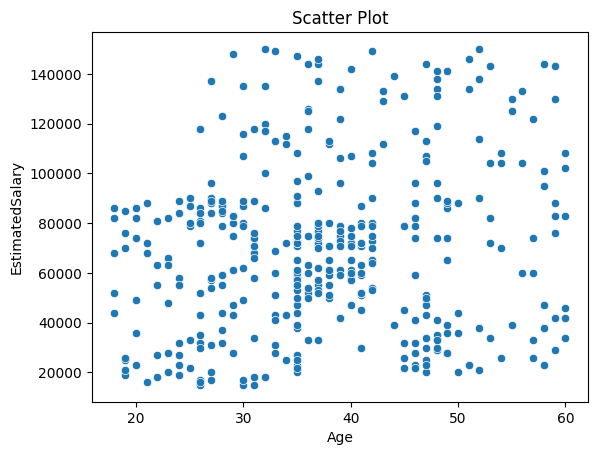

In [16]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Scatter Plot')
plt.show()

In [17]:
#Splitting data in x and y
x = df.drop(columns=['Purchased'])
y=df['Purchased']

In [18]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [19]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [20]:
#Splitting data into test and train data using train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
#Importing all tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [23]:
#Defining sequential deep learning model.
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2)) #This is the hidden layer where there are 128 hidden neurons with 2 inputs from input layer
model.add(Dense(1,activation='sigmoid'))  #This is output layer with single neuron and We have sigmoid activation function as it is a classification problem.

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Compiling the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
#FItting the model on training data and store the logs in history
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6169 - loss: 1799.3954 - val_accuracy: 0.4000 - val_loss: 732.1725
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4154 - loss: 516.5744 - val_accuracy: 0.6000 - val_loss: 228.8280
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4930 - loss: 146.9016 - val_accuracy: 0.6000 - val_loss: 322.4301
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5187 - loss: 225.5968 - val_accuracy: 0.6000 - val_loss: 110.4388
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5350 - loss: 57.8746 - val_accuracy: 0.6000 - val_loss: 13.1981
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5096 - loss: 19.9197 - val_accuracy: 0.4000 - val_loss: 86.8221
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4025 - loss: 75.4467 - val_accuracy: 0.6000 - val_loss: 13.6653
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4710 - loss: 59.45

<ipython-input-31-91b30ada8433>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


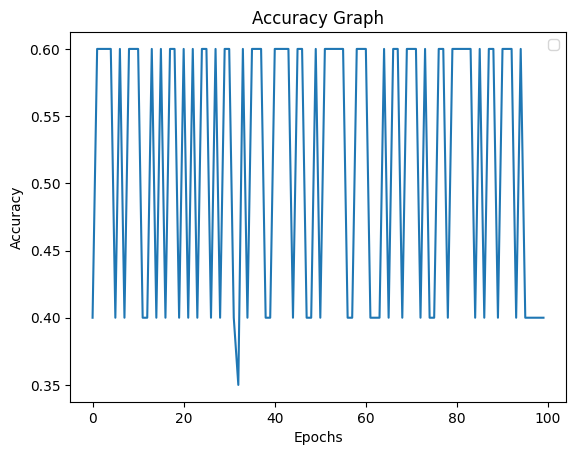

In [31]:
#Drawing the graph of validation accuracy
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

Here thing to notice is that validation accuracy is kind of oscillating from 0.4 to 0.6. Val_accuracy is not increasing beyond 0.6.This oscillation happend because our input data columns age and estimatedSalary were in very different range.Had we normalized or put both column range in same scale, we would have got better performance on validation data or our validation accuracy wouldnt have oscillated in between 0.4 to 0.6.

**Understanding why feature scaling needed-**

We had two input columns age and salary with age is of range 0 to 80 and salary is of range 10000 to 50000. When backpropogation hapens to update the weight and biases , our model see there is more changes happening in salary weights feature and comparativvely very less changes in age features because age is in very small change.So our model will kind of ignore the age feature column and it wont correctly extract the age feature. So we will get the oscilation in validation accuracy as we got for the above implementation of code where it was oscillating from 0.4 to 0.6.

To overcome this issue,before training the model it is necessary to normalize the data in common range.

**Two types of Feature Scaling Techniques-**

**Standardization Technique-**

We have a dataset in a large range then we try to make the mean of whole data as 0 and standard deviationa as 1.

 x_scaled = (original_feature_value - mean_of_the_feature)/standard_deviation

**Normalization Technique-**

We try to put the datarange from 0 to 1 and makes it sensetive to outliers.

X _scaled = (X_max - X_min)/(Xmax - Xmin)

**Now we will again train the neural network but with scaled input data to rectify that oscillatory validation accuracy on test data**

In [34]:
#Importing StandardScaler function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train_scaled
#Here two columns of age and salary with nearly common range of values
#Values ranges from 0 to 1 and its mean is 0

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

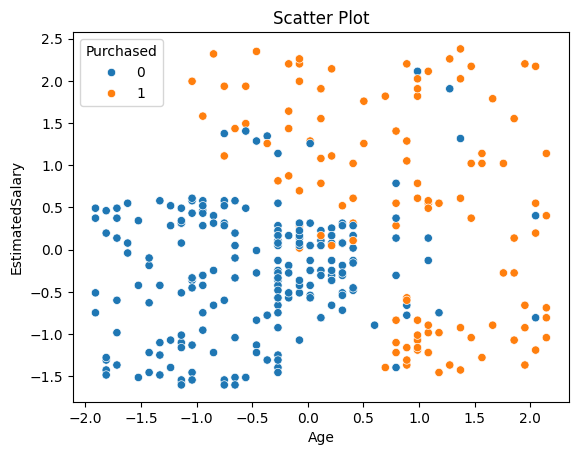

In [36]:
#Plotting  x_train_scaled for better understanding
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1],hue=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Scatter Plot')
plt.show()


In [37]:
#Now we will again run the same model that we train for above oscillation of validation accuracy understanding
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2)) #This is the hidden layer where there are 128 hidden neurons with 2 inputs from input layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#Compile the new model
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
#Fitting the model on x_train_scaled
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.4837 - loss: 0.6778 - val_accuracy: 0.8750 - val_loss: 0.6206
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8164 - loss: 0.6213 - val_accuracy: 0.8125 - val_loss: 0.5683
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8768 - loss: 0.5653 - val_accuracy: 0.8125 - val_loss: 0.5234
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8410 - loss: 0.5418 - val_accuracy: 0.7875 - val_loss: 0.4861
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8309 - loss: 0.4920 - val_accuracy: 0.7875 - val_loss: 0.4539
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8558 - loss: 0.4623 - val_accuracy: 0.8000 - val_loss: 0.4272
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8697 - loss: 0.4240 - val_accuracy: 0.8125 - val_loss: 0.4030
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8416 - loss: 0.4165 - val_accuracy: 0

Here observe that validation accuray was contiuously increasing over the period of training in each epoch.

<ipython-input-42-1941fefd0c61>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


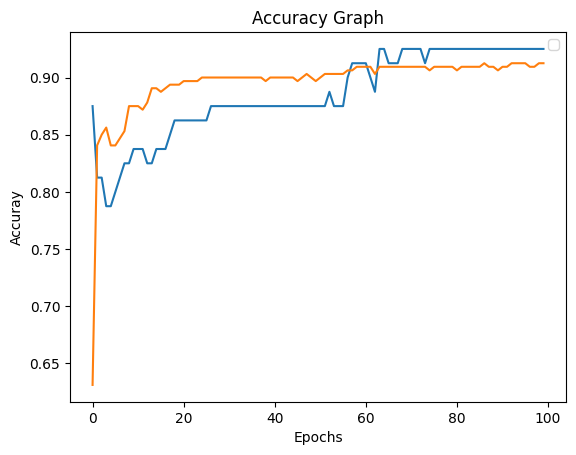

In [42]:
#Plotting validation accuray over each epochs
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuray')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

Here thing to notice is that our validation accuracy is not oscillating in range. It is gradually increasing over the period of epochs.And this is what we need to incrase the val_accuracy and not the oscillating val_accuracy that we got in previous example.